In [1]:
from PIL import Image, ImageFilter
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
%matplotlib inline

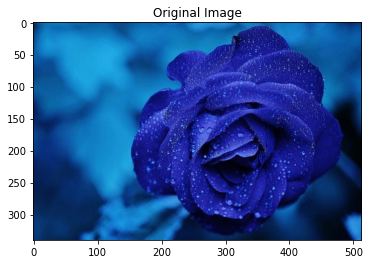

In [2]:
img = cv2.imread('blue.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
img_data=np.array(img)


# 1. Dilation

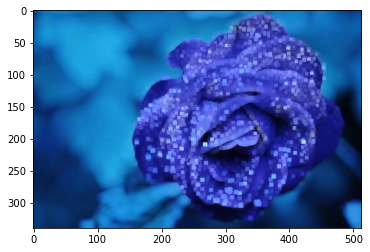

In [3]:
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(img, kernel, iterations=1)
plt.imshow(img_dilation)


# 2. Erosion

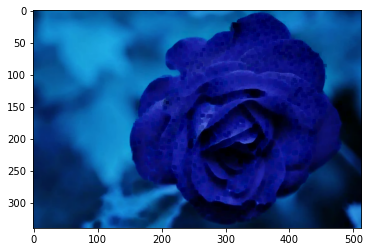

In [5]:
img_erosion = cv2.erode(img, kernel, iterations=1)
plt.imshow(img_erosion)

# 3. Opening

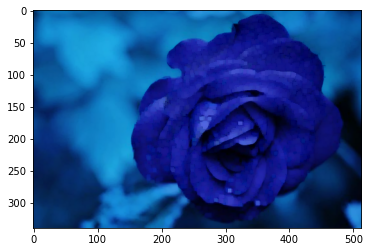

In [7]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.imshow(opening)

# 4. Closing

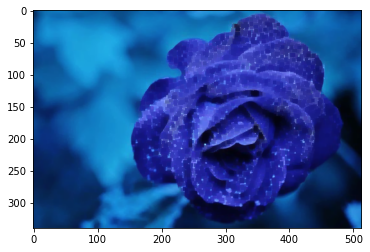

In [8]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)


# 5. Boundary Detection

Text(0.5, 1.0, 'Horizontal + Vertical')

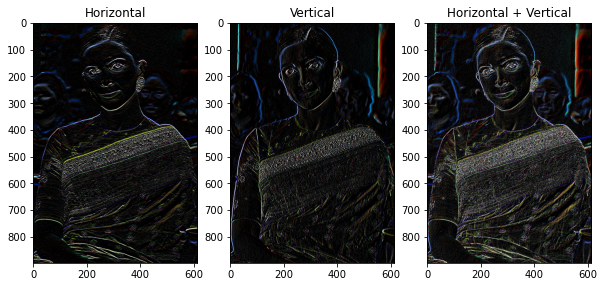

In [9]:
plt.figure(figsize=(10,10))
image = cv2.imread('Deepika.jpg',1)
sobelkernelH=np.array([[-1,-2,-1],
[0,0,0],
[1,2,1]])
sobelH = cv2.filter2D(src=image,kernel=sobelkernelH,ddepth=-1)
plt.subplot(1,3,1)
plt.imshow(sobelH)
plt.title('Horizontal')
sobelkernelV=np.array([[-1,0,1],
[-2,0,2],
[-1,0,1]])
sobelV = cv2.filter2D(src=image,kernel=sobelkernelV,ddepth=-1)
plt.subplot(1,3,2)
plt.imshow(sobelV)
plt.title('Vertical')
sobel=sobelH + sobelV
plt.subplot(1,3,3)
plt.imshow(sobel)
plt.title('Horizontal + Vertical')


# 6. Region Filling

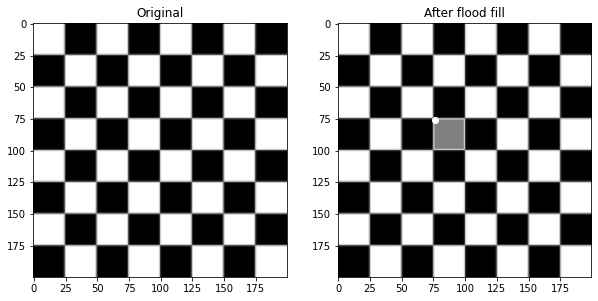

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill
checkers = data.checkerboard()
# Fill a square near the middle with value 127, starting at index (76, 76)
filled_checkers = flood_fill(checkers, (76, 76), 127)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(checkers, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[1].imshow(filled_checkers, cmap=plt.cm.gray)
ax[1].plot(76, 76, 'wo') # seed point
ax[1].set_title('After flood fill')
plt.show()

# 7. Thinning

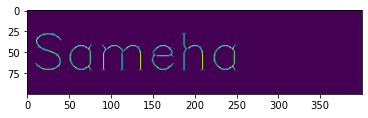

In [13]:
img = np.zeros((100,400),dtype='uint8')
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'Sameha',(5,70), font, 2,(255),5,cv2.LINE_AA)
img1 = img.copy()
plt.imshow(img)
# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Create an empty output image to hold values
thin = np.zeros(img.shape,dtype='uint8')
# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
 # Erosion
 erode = cv2.erode(img1,kernel)
 # Opening on eroded image
 opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
 # Subtract these two
 subset = erode - opening
 # Union of all previous sets
 thin = cv2.bitwise_or(subset,thin)
 # Set the eroded image for next iteration
 img1 = erode.copy()
 
#plt.imshow(img)
plt.imshow(thin)


# 8. Thickening


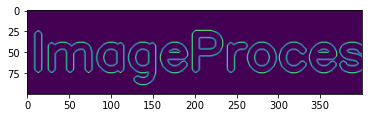

In [12]:
img = np.zeros((100,400),dtype='uint8')
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'ImageProcessing',(5,70), font, 2,(255),5,cv2.LINE_AA)
# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
thick =np.zeros(img.shape,dtype='uint8')
img_dilation = cv2.dilate(img, kernel, iterations=1)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
subset_img2 = img_dilation-closing
thick = cv2.bitwise_or(subset_img2,thick)
plt.imshow(thick)


# 9. Convex Hull

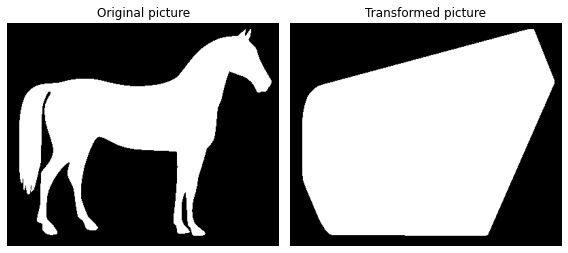

In [17]:
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert
# The original image is inverted as the object must be white.
image = invert(data.horse())
chull = convex_hull_image(image)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()
plt.tight_layout()
plt.show()


# 10. Skeleton

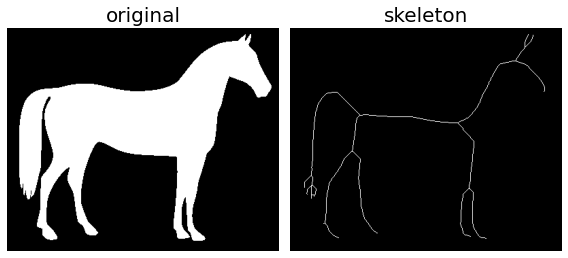

In [15]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
# Invert the horse image
image = invert(data.horse())
# perform skeletonization
skeleton = skeletonize(image)
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
 sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)
ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)
fig.tight_layout()
plt.show()
